In [37]:
import pandas as pd
import numpy as np
import warnings
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import recall_score, classification_report, mean_squared_error, mean_absolute_error, \
    accuracy_score, precision_score, f1_score, confusion_matrix, r2_score
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
df=pd.read_csv('credit_dataset.csv')
missing=df.isnull().sum()

print("Numbers of Rows : ", df.shape[0])
print("Number of columns : ", df.shape[1])
print(df.info())
df.head()


Numbers of Rows :  25134
Number of columns :  20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-n

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [40]:
df.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

In [41]:
#Dropping the the FLAG_MOBIL attribute as it has only 1 unique value

df.drop(columns=['FLAG_MOBIL'], inplace=True)


In [42]:
fraud_trans = df['TARGET'].value_counts()[1]
valid_trans = df['TARGET'].value_counts()[0]

print("Number of Fraudulent Transaction : ",fraud_trans," =" ,(fraud_trans/25134)*100)
print("Number of Valid Transaction : " ,valid_trans,"=",(valid_trans/25134)*100)


Number of Fraudulent Transaction :  422  = 1.6790005570144029
Number of Valid Transaction :  24712 = 98.3209994429856


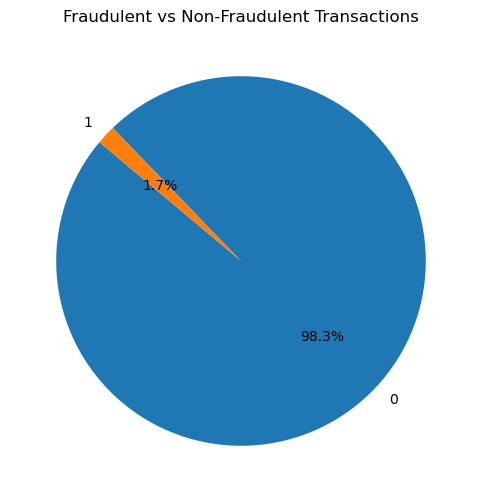

In [43]:


# Given values and labels
values = [24712, 422]
labels = ['0', '1']

# Create a pie chart
plt.figure(figsize=(6, 6))  # Optional: set the figure size
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title (optional)
plt.title('Fraudulent vs Non-Fraudulent Transactions')

# Display the pie chart
plt.show()

In [44]:
#Encoding the Attributes :
'''
gender”, “car”, “reality”,
“income_type”, “education_type”, “house_type”, and “family_type '''

print("Gender : ",df['GENDER'].unique())
print("car : ",df['CAR'].unique())
print("reality : ",df['REALITY'].unique())
print("income_type : ",df['INCOME_TYPE'].unique())
print("education_type : ",df['EDUCATION_TYPE'].unique())
print("house_type : ",df['HOUSE_TYPE'].unique())
print("family_type : ",df['FAMILY_TYPE'].unique())

Gender :  ['M' 'F']
car :  ['Y' 'N']
reality :  ['Y' 'N']
income_type :  ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
education_type :  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
house_type :  ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
family_type :  ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']


In [140]:


columns_to_encode = ["GENDER", "CAR", "REALITY", "FAMILY_TYPE", "INCOME_TYPE", "EDUCATION_TYPE", "HOUSE_TYPE"]
le = LabelEncoder()

for column in columns_to_encode:
    encoded = le.fit_transform(df[column])
    df[column] = encoded



In [141]:
rows_with_target_1 = df[df['TARGET'] == 1]
rows_with_target_1

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
508,508,5009628,0,0,0,0,238500,4,4,1,1,1,0,0,2,59,53,9,1
664,664,5009938,0,0,1,2,157500,4,4,1,1,0,0,0,4,39,29,6,1
956,956,5010535,0,1,0,2,135000,4,4,1,1,0,0,0,4,52,38,8,1
960,960,5010541,0,1,0,2,135000,4,4,1,1,0,0,0,4,52,38,8,1
1177,1177,5010864,1,1,1,1,450000,0,4,1,1,0,1,1,3,51,50,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,1,1,1,0,315000,4,4,1,1,0,0,0,2,11,48,7,1
25130,25130,5149834,0,0,1,0,157500,0,1,1,1,0,1,1,2,23,34,4,1
25131,25131,5149838,0,0,1,0,157500,1,1,1,1,0,1,1,2,32,34,4,1
25132,25132,5150049,0,0,1,0,283500,4,4,1,1,0,0,0,2,9,49,2,1


In [46]:
df['INCOME'] = df['INCOME'].astype('int64')
df['FAMILY SIZE'] = df['FAMILY SIZE'].astype('int64')

In [47]:
X=df.drop(columns='TARGET')
y=df['TARGET']

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      25134 non-null  int64
 1   ID              25134 non-null  int64
 2   GENDER          25134 non-null  int64
 3   CAR             25134 non-null  int64
 4   REALITY         25134 non-null  int64
 5   NO_OF_CHILD     25134 non-null  int64
 6   INCOME          25134 non-null  int64
 7   INCOME_TYPE     25134 non-null  int64
 8   EDUCATION_TYPE  25134 non-null  int64
 9   FAMILY_TYPE     25134 non-null  int64
 10  HOUSE_TYPE      25134 non-null  int64
 11  WORK_PHONE      25134 non-null  int64
 12  PHONE           25134 non-null  int64
 13  E_MAIL          25134 non-null  int64
 14  FAMILY SIZE     25134 non-null  int64
 15  BEGIN_MONTH     25134 non-null  int64
 16  AGE             25134 non-null  int64
 17  YEARS_EMPLOYED  25134 non-null  int64
dtypes: int64(18)
memory usage:

In [48]:

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [49]:
# Using dt classifier 
start_time = time.time()
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time
print(f"Time taken to train the model: {training_time:.2f} seconds")

Time taken to train the model: 0.23 seconds


In [50]:
recall = recall_score(y_test, y_pred)
recall

0.6728971962616822

In [51]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6177
           1       0.60      0.67      0.63       107

    accuracy                           0.99      6284
   macro avg       0.79      0.83      0.81      6284
weighted avg       0.99      0.99      0.99      6284



In [52]:
start_time = time.time()
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))
end_time = time.time()
training_time = end_time - start_time


print(f"Time taken to train the model: {training_time:.2f} seconds")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6177
           1       0.87      0.67      0.76       107

    accuracy                           0.99      6284
   macro avg       0.93      0.84      0.88      6284
weighted avg       0.99      0.99      0.99      6284

Time taken to train the model: 3.12 seconds


In [53]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred = qda_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6177
           1       0.32      0.39      0.35       107

    accuracy                           0.98      6284
   macro avg       0.66      0.69      0.67      6284
weighted avg       0.98      0.98      0.98      6284



In [54]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [55]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(X,y)

In [56]:
y_sm.value_counts()

TARGET
0    24712
1    24712
Name: count, dtype: int64

In [57]:
y_sm.value_counts()

TARGET
0    24712
1    24712
Name: count, dtype: int64

In [58]:
def underSampling():
    

    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    x_under,y_under = undersampler.fit_resample(X,y)
    
   
    xtrain,xtest,ytrain,ytest=train_test_split(x_under,y_under,test_size=.20,stratify=y_under)
    
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')

    knn.fit(xtrain,ytrain)
    ypre_knn=knn.predict(xtest)
    print("report\n",classification_report(ytest,ypre_knn,digits=6))
    
    lda = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)

    lda.fit(xtrain, ytrain)
    ypre_lda = lda.predict(xtest)
    print("lda report\n", classification_report(ytest, ypre_lda))
    
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    ypre_lr=lr.predict(xtest)

    mse = mean_squared_error(ytest, ypre_lr)
    mae = mean_absolute_error(ytest, ypre_lr)


    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    
    mvl = np.mean(ypre_lr)

    # Initialize the final predictions array
    por = np.zeros_like(ytest)

    for i in range(0,len(ypre_lr)):
        if(ypre_knn[i]==0 or ypre_lda[i]==0):
            if(ypre_lr[i]<mvl):
                por[i]=0
        elif(ypre_knn[i]==1 or ypre_lda[i]==1):
            if(ypre_lr[i]>mvl):
                por[i]=1
        else:
            por[i]=ypre_knn[i]
    print(classification_report(ytest,por))
    

In [59]:
underSampling()

report
               precision    recall  f1-score   support

           0   0.758242  0.811765  0.784091        85
           1   0.794872  0.738095  0.765432        84

    accuracy                       0.775148       169
   macro avg   0.776557  0.774930  0.774762       169
weighted avg   0.776448  0.775148  0.774817       169

lda report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        85
           1       0.80      0.82      0.81        84

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169

Mean Squared Error (MSE): 0.1316675044582883
Mean Absolute Error (MAE): 0.307717330025218
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        85
           1       0.90      0.62      0.73        84

    accuracy                           0.78       169
   macro avg      

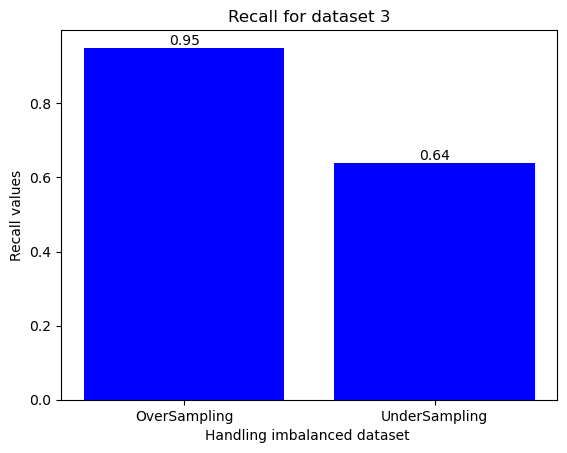

In [60]:
categories = ['OverSampling', "UnderSampling"]
values = [0.95,0.64 ]  
colors = ['blue', 'blue']
fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=colors)
for bar in bars:
    x_val = bar.get_x() + bar.get_width() / 2  
    y_val = bar.get_height()  
    ax.text(x_val, y_val, f'{y_val:.2f}',  
            ha='center', va='bottom')  

ax.set_title('Recall for dataset 3')
ax.set_xlabel('Handling imbalanced dataset ')
ax.set_ylabel('Recall values')

plt.show()

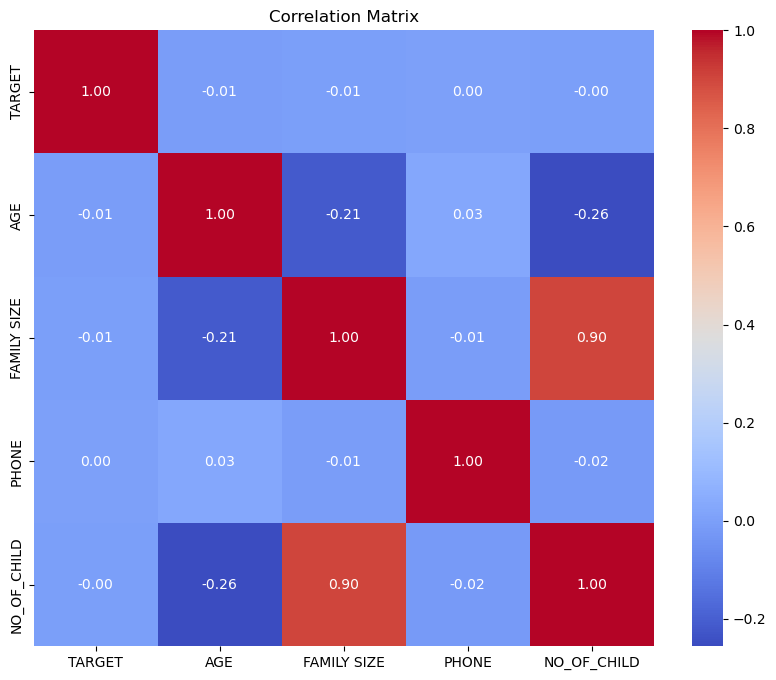

In [61]:
#Target , Age , Family_Size , Phone , No_of_Child , Unnamed 

#Correlation matrix



# Select the columns you want to include in the correlation matrix
columns = ['TARGET', 'AGE', 'FAMILY SIZE', 'PHONE', 'NO_OF_CHILD']

# Compute the correlation matrix
corr_matrix = df[columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # fmt=".2f" for 2 decimal places
plt.title('Correlation Matrix')
plt.show()


In [62]:
column_names = list(df.columns)

column_names.remove("TARGET")

print(column_names)
print(len(column_names))

['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED']
18


Unnamed: 0: 0.13839
ID: 0.00104
GENDER: 0.00154
CAR: 0.00199
REALITY: 0.00109
NO_OF_CHILD: 0.30016
INCOME: 0.00058
INCOME_TYPE: 0.00115
EDUCATION_TYPE: 0.53974
FAMILY_TYPE: 0.00191
HOUSE_TYPE: 0.00220
FLAG_MOBIL: 0.00102
WORK_PHONE: 0.00224
PHONE: 0.00072
E_MAIL: 0.00280
FAMILY SIZE: 0.00092
BEGIN_MONTH: 0.00080
AGE: 0.00081
YEARS_EMPLOYED: 0.00089


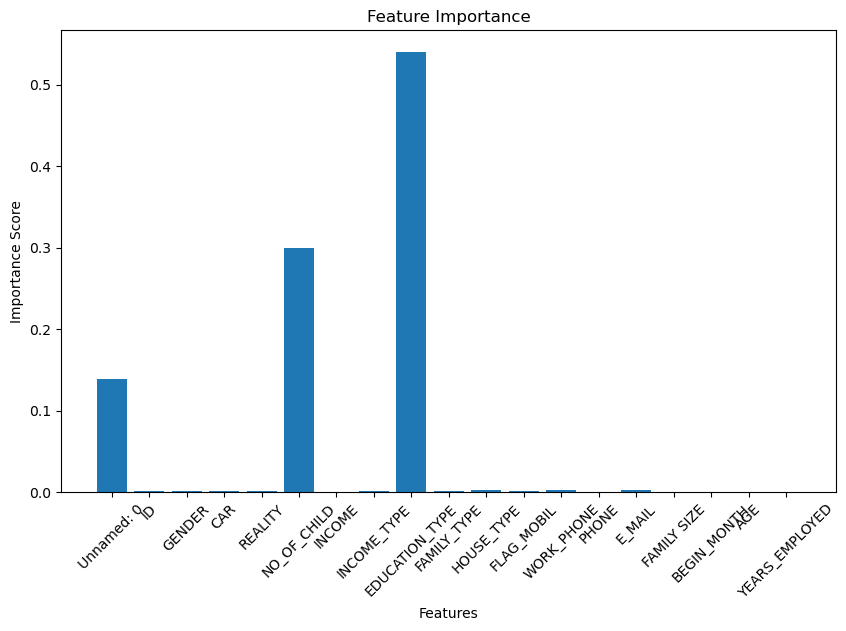

In [63]:



# Define dataset
X, y = make_regression(n_samples=1000, n_features=19, n_informative=5, random_state=1)

# Define the model
model = XGBRegressor()

# Fit the model
model.fit(X, y)

# Get importance
importance = model.feature_importances_

# Get feature names from the dataset (assuming you have them)
feature_names = ['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME', 'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED'] # Modify this based on your actual feature names

# Summarize feature importance
for i,v in enumerate(importance):
    print(f'{feature_names[i]}: {v:.5f}')

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
bar = ax.bar(feature_names, importance)
ax.set_xlabel('Features')
ax.set_ylabel('Importance Score')
ax.set_title('Feature Importance')
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [64]:
# Original attribute-value pairs
attributes = {
    'Unnamed: 0': 0.13839,
    'ID': 0.00104,
    'GENDER': 0.00154,
    'CAR': 0.00199,
    'REALITY': 0.00109,
    'NO_OF_CHILD': 0.30016,
    'INCOME': 0.00058,
    'INCOME_TYPE': 0.00115,
    'EDUCATION_TYPE': 0.53974,
    'FAMILY_TYPE': 0.00191,
    'HOUSE_TYPE': 0.00220,
    'FLAG_MOBIL': 0.00102,
    'WORK_PHONE': 0.00224,
    'PHONE': 0.00072,
    'E_MAIL': 0.00280,
    'FAMILY SIZE': 0.00092,
    'BEGIN_MONTH': 0.00080,
    'AGE': 0.00081,
    'YEARS_EMPLOYED': 0.00089
}

# Sort the attributes in descending order of values
sorted_attributes = sorted(attributes.items(), key=lambda x: x[1], reverse=True)

# Print the sorted attributes
for attr, value in sorted_attributes:
    print(f"{attr}: {value}")


EDUCATION_TYPE: 0.53974
NO_OF_CHILD: 0.30016
Unnamed: 0: 0.13839
E_MAIL: 0.0028
WORK_PHONE: 0.00224
HOUSE_TYPE: 0.0022
CAR: 0.00199
FAMILY_TYPE: 0.00191
GENDER: 0.00154
INCOME_TYPE: 0.00115
REALITY: 0.00109
ID: 0.00104
FLAG_MOBIL: 0.00102
FAMILY SIZE: 0.00092
YEARS_EMPLOYED: 0.00089
AGE: 0.00081
BEGIN_MONTH: 0.0008
PHONE: 0.00072
INCOME: 0.00058


In [65]:
# Define the top N significant attributes
significant_attributes = {
    'Unnamed: 0': 0.13839,
    'ID': 0.00104,
    'GENDER': 0.00154,
    'CAR': 0.00199,
    'REALITY': 0.00109,
    'NO_OF_CHILD': 0.30016,
    'INCOME': 0.00058,
    'INCOME_TYPE': 0.00115,
    'EDUCATION_TYPE': 0.53974,
    'FAMILY_TYPE': 0.00191,
    'HOUSE_TYPE': 0.00220,
    'WORK_PHONE': 0.00224,
    'PHONE': 0.00072,
    'E_MAIL': 0.00280,
    'FAMILY SIZE': 0.00092,
    'BEGIN_MONTH': 0.00080,
    'AGE': 0.00081,
    'YEARS_EMPLOYED': 0.00089
}

# Sort the attributes based on their importance
sorted_attributes = sorted(significant_attributes.items(), key=lambda x: x[1], reverse=True)

# Define lists to store recall values for kNN, LDA, and LR
recall_knn_list = []
recall_lda_list = []
mse_LR = [] 
mae_LR = [] 
rmse_LR = []

pKNN,pLDA,pLR =[],[],[]

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Iterate over the range of top_n_attributes from 5 to 18
for top_n_attributes in range(5, 19):
    # Select the top N attributes
    top_n_attributes_names = [attr for attr, _ in sorted_attributes[:top_n_attributes]]

    # Initialize lists to store recall values for each fold
    recall_knn_fold = []
    recall_lda_fold = []
    recall_lr_fold = []

    # Iterate over the folds
    for train_index, test_index in skf.split(x_sm, y_sm):
        x_train_fold, x_test_fold = x_sm[top_n_attributes_names].iloc[train_index], x_sm[top_n_attributes_names].iloc[test_index]
        y_train_fold, y_test_fold = y_sm.iloc[train_index], y_sm.iloc[test_index]

        # Fit kNN model
        knn = KNeighborsClassifier()
        knn.fit(x_train_fold, y_train_fold)
        y_pred_knn = knn.predict(x_test_fold)
        pKNN.extend(y_pred_knn)
        recall_knn = recall_score(y_test_fold, y_pred_knn)
        recall_knn_fold.append(recall_knn)

        # Fit LDA model
        lda = LinearDiscriminantAnalysis()
        lda.fit(x_train_fold, y_train_fold)
        y_pred_lda = lda.predict(x_test_fold)
        pLDA.extend(y_pred_lda)
        recall_lda = recall_score(y_test_fold, y_pred_lda)
        recall_lda_fold.append(recall_lda)

        # Fit LR model
        LR = LinearRegression()
        LR.fit(x_train_fold, y_train_fold)
        y_LR = LR.predict(x_test_fold)
        pLR.extend(y_LR)
        mse = mean_squared_error(y_test_fold, y_LR)
        mae = mean_absolute_error(y_test_fold, y_LR)
        rmse = np.sqrt(mse)

        mse_LR.append(mse)
        mae_LR.append(mae)
        rmse_LR.append(rmse)

    # Calculate the mean recall values for each model and append to the respective lists
    recall_knn_list.append(np.mean(recall_knn_fold))
    recall_lda_list.append(np.mean(recall_lda_fold))

# Print the recall values for each top_n_attributes
for i, top_n_attributes in enumerate(range(5, 19)):
    print(f"Top {top_n_attributes} Attributes:")
    print(f"Mean Recall (kNN): {recall_knn_list[i]}")
    print(f"Mean Recall (LDA): {recall_lda_list[i]}")
#     print(f"Mean Recall (LR): {recall_lr_list[i]}")
    print()


Top 5 Attributes:
Mean Recall (kNN): 0.721390439435301
Mean Recall (LDA): 0.7875526939935991

Top 6 Attributes:
Mean Recall (kNN): 0.7262059186584612
Mean Recall (LDA): 0.7886452052794819

Top 7 Attributes:
Mean Recall (kNN): 0.7291195140588136
Mean Recall (LDA): 0.8098898302649393

Top 8 Attributes:
Mean Recall (kNN): 0.7352299664168281
Mean Recall (LDA): 0.8034153821390644

Top 9 Attributes:
Mean Recall (kNN): 0.7372937034602399
Mean Recall (LDA): 0.809242425569747

Top 10 Attributes:
Mean Recall (kNN): 0.7504453644882293
Mean Recall (LDA): 0.7994094801334157

Top 11 Attributes:
Mean Recall (kNN): 0.7521044234504022
Mean Recall (LDA): 0.8034963619663188

Top 12 Attributes:
Mean Recall (kNN): 0.9435493889752322
Mean Recall (LDA): 0.7522663831049112

Top 13 Attributes:
Mean Recall (kNN): 0.9436707809374912
Mean Recall (LDA): 0.7567984861496331

Top 14 Attributes:
Mean Recall (kNN): 0.9456940649097814
Mean Recall (LDA): 0.7580530144005893

Top 15 Attributes:
Mean Recall (kNN): 0.9481625

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=.20,stratify=y_sm)

In [107]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9885 entries, 30591 to 33265
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      9885 non-null   int64
 1   ID              9885 non-null   int64
 2   GENDER          9885 non-null   int64
 3   CAR             9885 non-null   int64
 4   REALITY         9885 non-null   int64
 5   NO_OF_CHILD     9885 non-null   int64
 6   INCOME          9885 non-null   int64
 7   INCOME_TYPE     9885 non-null   int64
 8   EDUCATION_TYPE  9885 non-null   int64
 9   FAMILY_TYPE     9885 non-null   int64
 10  HOUSE_TYPE      9885 non-null   int64
 11  WORK_PHONE      9885 non-null   int64
 12  PHONE           9885 non-null   int64
 13  E_MAIL          9885 non-null   int64
 14  FAMILY SIZE     9885 non-null   int64
 15  BEGIN_MONTH     9885 non-null   int64
 16  AGE             9885 non-null   int64
 17  YEARS_EMPLOYED  9885 non-null   int64
dtypes: int64(18)
memory usage: 1

In [67]:
#kNN

start_time = time.time()
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
knn.fit(xtrain,ytrain)
ypre_knn=knn.predict(xtest)
print("report\n",classification_report(ytest,ypre_knn,digits=6))
end_time = time.time()
training_time = end_time - start_time
print(f"Time taken to train the model: {training_time:.2f} seconds")

report
               precision    recall  f1-score   support

           0   0.955709  0.982396  0.968868      4942
           1   0.981894  0.954481  0.967993      4943

    accuracy                       0.968437      9885
   macro avg   0.968801  0.968438  0.968431      9885
weighted avg   0.968803  0.968437  0.968431      9885

Time taken to train the model: 17.12 seconds


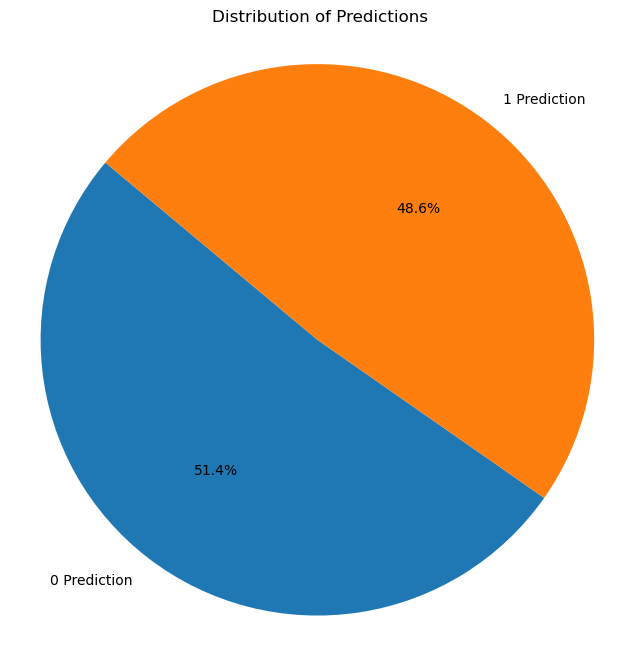

In [68]:
counts = [len(ypre_knn[ypre_knn == 0]), len(ypre_knn[ypre_knn == 1])]
labels = ['0 Prediction', '1 Prediction']
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predictions')
plt.axis('equal') 
plt.show()


In [69]:
#LDA 
lda = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
lda.fit(xtrain, ytrain)
ypre_lda = lda.predict(xtest)
print("lda report\n", classification_report(ytest, ypre_lda))


lda report
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4942
           1       0.86      0.83      0.84      4943

    accuracy                           0.85      9885
   macro avg       0.85      0.85      0.85      9885
weighted avg       0.85      0.85      0.85      9885



In [70]:
#LR 
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypre_lr=lr.predict(xtest)

mse = mean_squared_error(ytest, ypre_lr)
mae = mean_absolute_error(ytest, ypre_lr)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.12060286498371889
Mean Absolute Error (MAE): 0.289129437857957


In [71]:
# Calculate the mean prediction of LR model

mvl = np.mean(ypre_lr)

# Initialize the final predictions array
por = np.zeros_like(ytest)
for i in range(0,len(ypre_lr)):
    if(ypre_knn[i]==0 or ypre_lda[i]==0):
        if(ypre_lr[i]<mvl):
            por[i]=0
    elif(ypre_knn[i]==1 or ypre_lda[i]==1):
        if(ypre_lr[i]>mvl):
            por[i]=1
    else:
        por[i]=ypre_knn[i]

In [72]:
print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4942
           1       1.00      0.80      0.89      4943

    accuracy                           0.90      9885
   macro avg       0.91      0.90      0.90      9885
weighted avg       0.91      0.90      0.90      9885



In [73]:
# Calculate the mean prediction of LR model
mvl = np.mean(ypre_lr)
por = np.zeros_like(ytest)
for i in range(len(ypre_lr)):
    if (ypre_knn[i] == 0 or ypre_lda[i] == 0) and ypre_lr[i] < mvl:
        por[i] = 0
    elif (ypre_knn[i] == 1 or ypre_lda[i] == 1) and ypre_lr[i] > mvl:
        por[i] = 1
    else:
        por[i] = ypre_knn[i]

print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4942
           1       0.86      0.83      0.85      4943

    accuracy                           0.85      9885
   macro avg       0.85      0.85      0.85      9885
weighted avg       0.85      0.85      0.85      9885



In [74]:
#modified ALgorithm - Novelity


PKNN = ypre_knn
PLDA = ypre_lda
PLR = ypre_lr
por = np.zeros_like(ytest)
threshold = 0.43


for i in range(len(ytest)):
    avg = (PKNN[i] + PLDA[i] + PLR[i]) / 3
    if avg > threshold:
        por[i] = 1
    else:
        por[i] = 0


In [75]:
print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      4942
           1       0.87      0.96      0.91      4943

    accuracy                           0.91      9885
   macro avg       0.91      0.91      0.91      9885
weighted avg       0.91      0.91      0.91      9885



In [76]:
#modified ALgorithm - Novelity
# Here we have taken the threshold value as 0.5 

PKNN = ypre_knn
PLDA = ypre_lda
PLR = ypre_lr
por = np.zeros_like(ytest)
threshold = 0.5
for i in range(len(ytest)):

    avg = (PKNN[i] + PLDA[i] + PLR[i]) / 3
    if avg > threshold:
        por[i] = 1
    else:
        por[i] = 0

In [77]:
print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4942
           1       0.86      0.83      0.84      4943

    accuracy                           0.85      9885
   macro avg       0.85      0.85      0.85      9885
weighted avg       0.85      0.85      0.85      9885



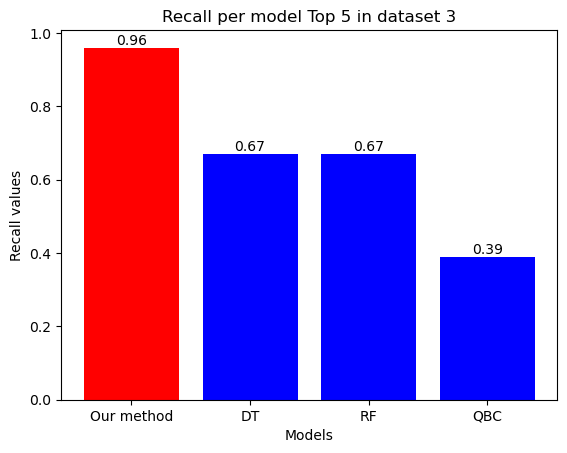

In [78]:
categories = ['Our method', 'DT', 'RF', 'QBC']
values = [0.96, 0.67, 0.67, 0.39]  
colors = ['red', 'blue', 'blue', 'blue']
fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=colors)
for bar in bars:
    x_val = bar.get_x() + bar.get_width() / 2  
    y_val = bar.get_height()  
    ax.text(x_val, y_val, f'{y_val:.2f}',  
            ha='center', va='bottom')  

ax.set_title('Recall per model Top 5 in dataset 3')
ax.set_xlabel('Models')
ax.set_ylabel('Recall values')

plt.show()

In [167]:

id_input = np.int64(5008899)

gender = np.int64(input("Enter Gender (0 -> Female, 1 -> Male): ") or 1)
car = np.int64(input("Do you own a car? (1 -> own, 0 -> No): ") or 0)
reality = np.int64(input("What is your reality status? (0 -> No, 1 -> Yes): ") or 1)
child = np.int64(input("Number of children: ") or 1)
income = np.int64(input("What is your monthly income? (Enter amount): ") or 112500.0)
income_type = np.int64(input("What is your income type? (0 to 4): ") or 1)
education_type = np.int64(input("What is your education level? (0 to 4): ") or 1)
family_type = np.int64(input("What is your family type? (0 to 4): ") or 1)
house_type = np.int64(input("What type of house do you live in? (0 to 5): ") or 1)
work_phone = np.int64(0)
phone = np.int64(input("Do you have a phone? (0 -> No, 1 -> Yes): ") or 0)
email = np.int64(input("Do you have an email address? (0 -> No, 1 -> Yes): ") or 0)
family_size = np.int64(input("How many family members are there? ") or 2)
begin_month = np.int64(input("In which month did you start? ") or 1)
years_employed = np.int64(input("How many years have you been employed? ") or 3)
age = np.int64(input("Enter age ")or 25)

Enter Gender (0 -> Female, 1 -> Male): 
Do you own a car? (1 -> own, 0 -> No): 
What is your reality status? (0 -> No, 1 -> Yes): 
Number of children: 
What is your monthly income? (Enter amount): 
What is your income type? (0 to 4): 
What is your education level? (0 to 4): 
What is your family type? (0 to 4): 
What type of house do you live in? (0 to 5): 
Do you have a phone? (0 -> No, 1 -> Yes): 
Do you have an email address? (0 -> No, 1 -> Yes): 
How many family members are there? 
In which month did you start? 
How many years have you been employed? 
Enter age 


In [173]:
data = {
    'Unnamed: 0' :[0],
    'ID': [id_input],
    'GENDER': [gender],
    'CAR': [car],
    'REALITY': [reality],
    'NO_OF_CHILD': [child],
    'INCOME': [income],
    'INCOME_TYPE': [income_type],
    'EDUCATION_TYPE': [education_type],
    'FAMILY_TYPE': [family_type],
    'HOUSE_TYPE': [house_type],
    'WORK_PHONE': [work_phone],
    'PHONE': [phone],
    'E_MAIL': [email],
    'FAMILY SIZE': [family_size],
    'BEGIN_MONTH': [begin_month],
    'AGE' : [age],
    'YEARS_EMPLOYED': [years_employed],
    
}

df_input = pd.DataFrame(data)
ypre_knn_input_new=knn.predict(df_input)
ypre_lda_input_new = lda.predict(df_input)
ypre_lr_input_new=lr.predict(df_input)

In [174]:
ypre_knn_input = (ypre_knn_input_new[0])
ypre_lda_input = (ypre_lda_input_new[0]) 
ypre_lr_input = ypre_lr_input_new[0]

In [175]:
por = 0 
if(ypre_knn_input ==0 or ypre_lda_input==0):
    if(ypre_lr_input<0.43):
        por=0
elif(ypre_input==1 or ypre_lda_input==1):
    if(ypre_lr_input>0.43):
        por =1
else:
    por=ypre_knn_input


if(por == 1 ):
    print("TRansaction is Fraud !!!!")
else : 
    print("Legit Transaction ")

Legit Transaction 


In [176]:
dt_pred_new = (clf.predict(df_input)[0])
if(dt_pred_new == 1):
    print("TRansaction is Fraud !!!!")
else : 
    print("Legit Transaction ")

Legit Transaction 
